#SIMPLE LINEAR REGRESSION

A statistical method used to model the relationship between two continuous variables.
It aims to find a straight line that best fits the data points, representing how one variable (the dependent variable) changes as the other variable (the independent variable) changes.
Key components:

Regression Equation:
Y = β0 + β1X + ε



Y: Dependent variable (the one you're trying to predict)



X: Independent variable (the predictor)



β0: Intercept (where the line crosses the Y-axis)



β1: Slope (the line's steepness, indicating how much Y changes for each unit change in X)

ε: Error term (accounting for random variability)


#Here’s How Linear Regression Algorithm Works

> Let’s understand how the Linear Regression algorithm works by taking an example of a real-time business problem on the Product Delivery.

-> Predicting delivery time using sorting time



In [114]:
import pandas as pd
df = pd.read_csv("/content/delivery_time.csv")
df.head(6)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6


In [115]:
df.shape

(21, 2)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [117]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [118]:
df.duplicated().sum()

0

In [119]:
df.describe(include='all')

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<ipython-input-120-bad077afc91b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Delivery Time', ylabel='Density'>

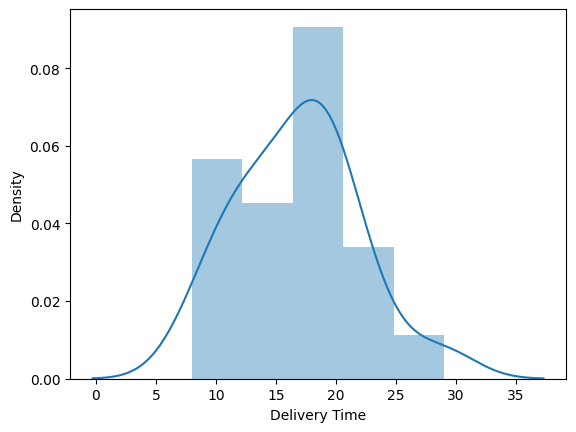

In [120]:
import seaborn as sns
sns.distplot(df["Delivery Time"])


<ipython-input-121-2d125c5c60cc>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Sorting Time', ylabel='Density'>

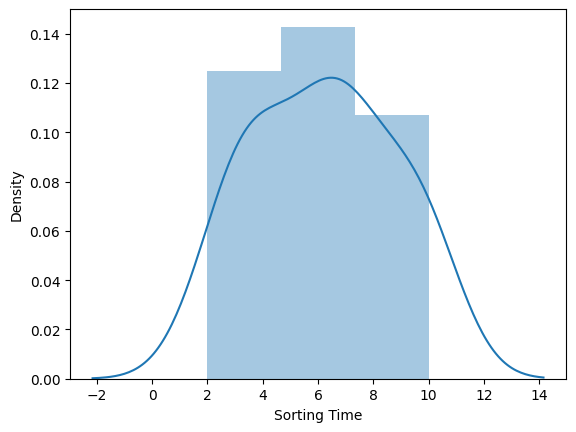

In [121]:
sns.distplot(df["Sorting Time"])


<Axes: >

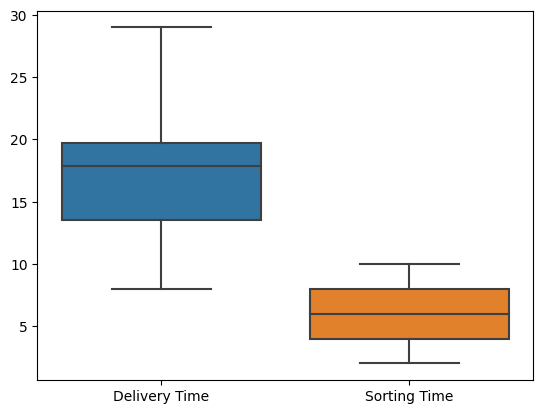

In [122]:
# prompt: sns.boxplot["Delivery Time"],["Sorting Time"]

sns.boxplot(df[['Delivery Time', 'Sorting Time']])


As per the data is correct in format there are no missing values and also there is no need of data transforming beacuse there are no Text
data in "X" and "Y" variableas as per above distplot and the boxplot of the "Delivery Time" and the "Sorting Time" we consider that the data has no outliers,
also its in the plot is in Normalization

In [123]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

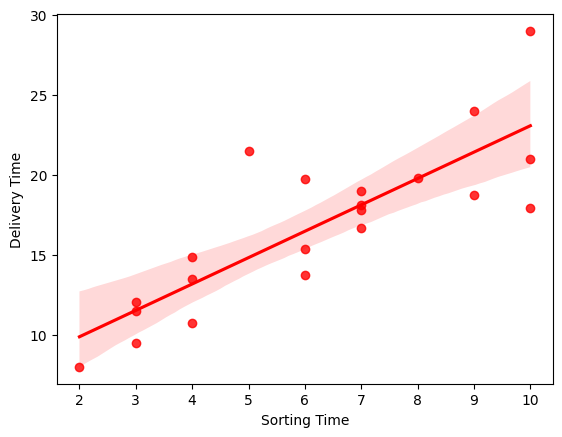

In [124]:
# prompt: sns.regplot(x=data['sorting_time'],y=data['delivery_time'].color)

sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'],color='r')


In [125]:
data=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data.head(5)

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Now let’s have a look at the relationship between the number of cupcakes sold and the amount of money made:

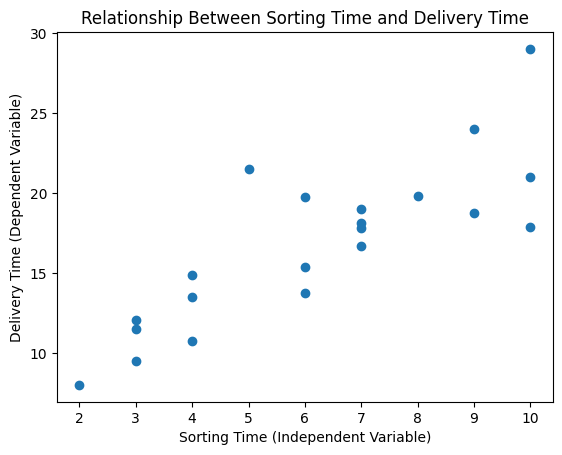

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

sorting_time = data['sorting_time']
delivery_time = data['delivery_time']

# Create a scatter plot
plt.scatter(sorting_time, delivery_time)
plt.title('Relationship Between Sorting Time and Delivery Time')
plt.xlabel('Sorting Time (Independent Variable)')
plt.ylabel('Delivery Time (Dependent Variable)')

# Show the plot
plt.show()

In [127]:
X = data[['sorting_time']]
Y = data['delivery_time']

Now here’s how to train a Machine Learning model using the linear regression algorithm:

In [128]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [129]:
model.fit(X,Y)

LinearRegression()

Now here’s how we can predict the value of a dependent variable using the value of an independent variable using our Machine Learning model:

In [130]:
data['Y_pred'] = model.predict(X)

In [131]:
data.head(5)

,delivery_time,sorting_time,Y_pred
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


In [132]:
model.score(X,Y)

0.6822714748417231

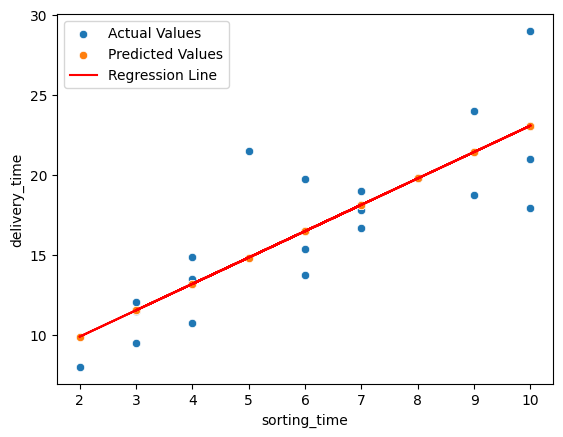

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Plotting actual vs. predicted values
sns.scatterplot(x='sorting_time', y='delivery_time', data=data, label="Actual Values")
sns.scatterplot(x='sorting_time', y='Y_pred', data=data, label="Predicted Values")
# Plot the regression line
plt.plot(data['sorting_time'],data["Y_pred"], color='red', label='Regression Line')
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.legend()
plt.show()


In [134]:
#model building

import statsmodels.formula.api as smf
model1 = smf.ols("delivery_time~sorting_time",data = data).fit()

In [135]:
print(model1.params,'\n''\n',model1.tvalues,'\n''\n', model1.pvalues)

Intercept       6.582734
sorting_time    1.649020
dtype: float64 

 Intercept       3.823349
sorting_time    6.387447
dtype: float64 

 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [136]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [137]:
#Predicted delivery time for the sorting sorting: *0.682*

Advantages & Disadvantages of Linear Regression
*italicized text*
Here are some advantages and disadvantages of the Linear Regression algorithm that you should know:


Advantages:
It’s easy to understand and use for making predictions in real-world problems.
It can analyze the relationship between two variables and make predictions based on their relationship.

Disadvantages:
It assumes a linear relationship between the input and output variables, which may not always be true.
It’s sensitive to outliers and can be affected by multicollinearity.


In [138]:
#Thank you